
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## Resolución ejercicio 1



In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Como columnas de interés seleccionamos las siguientes: ['tools_programming_languages', 'salary_monthly_BRUTO', 'salary_monthly_NETO']

In [3]:
columnas_de_interes = ['tools_programming_languages', 'salary_monthly_BRUTO', 'salary_monthly_NETO']

Definimos una variable 'Salario_maximo' a partir del salario bruto y el salario neto. Comparamos ambos salarios y tomamos el máximo de ambos. Esto lo planteamos como solución para los casos en los cuales el salario neto era más alto que el bruto 

In [4]:
df['Salario_maximo'] = np.where(df['salary_monthly_BRUTO'] > df['salary_monthly_NETO'], df['salary_monthly_BRUTO'], df['salary_monthly_NETO'])

In [5]:
# Maximo de todos los salarios
print("Salario maximo:", df['Salario_maximo'].max())
# Por si quedaban dudas de que llenan mal las encuestas. Un salario minimo en 1
print("Salario minimo", df['Salario_maximo'].min())

Salario maximo: 2180000.0
Salario minimo 1.0


Filtramos el dataframe excluyendo todos los salarios que estén por debajo del salario mínimo a Enero de 2021, y creamos uno nuevo que se llama *clean_max_salaries*

In [6]:
filtro = df['Salario_maximo'] > 25000
clean_max_salaries = df[filtro]

Definimos como salarios altos a todos aquellos que se encuentran en el cuarto cuartil de *clean_max_salaries*. A partir de eso creamos otro dataframe que se llama DF_Salarios_Altos

In [7]:
Quartil_75 = clean_max_salaries["Salario_maximo"].quantile(.75)
DF_Salarios_Altos = clean_max_salaries[clean_max_salaries["Salario_maximo"]>Quartil_75]

Calculamos el valor de corte para el cuarto cuartil

In [8]:
DF_Salarios_Altos["Salario_maximo"].min()

147150.0

Luego de haber definido Salario_maximo, redefinimos nuestro DF para contemplar solo esta variable y tools_programming_languages

In [9]:
DF_Salarios_Altos = DF_Salarios_Altos[['tools_programming_languages','Salario_maximo']].reset_index(drop=True)

In [10]:
### Utilizo codigo entregado para curar el DF

# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'Salario_maximo']


# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
DF_Salarios_Altos.loc[:, 'cured_programming_languages'] = DF_Salarios_Altos.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = DF_Salarios_Altos.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(DF_Salarios_Altos[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

# Aplico mismo codigo para df sin filtrar
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
df_lang2 = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

Nos quedamos con los 10 lenguajes más populares dentro del conjunto de salarios altos, e incluimos también la opción "Ninguno"

In [11]:
### Utilizo codigo entregado para calcular frecuencia de lenguajes en DF_Salarios_Altos

language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'freq_high_salaries'})

language_count2 = df_lang2.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'freq_all_salaries'})

# Genero DF con frecuencias de los 10 lenguajes mas utilizados y el caso especial de "Ningun Lenguaje"
mayor_languages = language_count[:10]
ningun_language = language_count[language_count['language']=='ninguno']
interest_languages = pd.concat([mayor_languages, ningun_language]).reset_index(drop=True)

# La agrego la frecuencia en el DF sin filtrar
interest_languages = pd.merge(interest_languages, language_count2, on="language")
interest_languages

,language,freq_high_salaries,freq_all_salaries
0,javascript,615,2513
1,sql,462,2154
2,python,457,1475
3,java,443,1453
4,html,365,1861
5,bash/shell,296,993
6,css,248,1247
7,typescript,224,779
8,php,191,891
9,.net,180,823


## 1.3- Análisis de métricas sobre el dataset filtrado
Se realiza una comparación de las distribuciones de los salarios más altos según el lengüaje utilizando herramientas graficas

Primero miramos los histogramas de cada lenguaje

<ipython-input-12-302fd9b5ffe4>:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)
<ipython-input-12-302fd9b5ffe4>:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)
<ipython-input-12-302fd9b5ffe4>:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)
<ipython-input-12-302fd9b5ffe4>:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)
<ipython-input-1

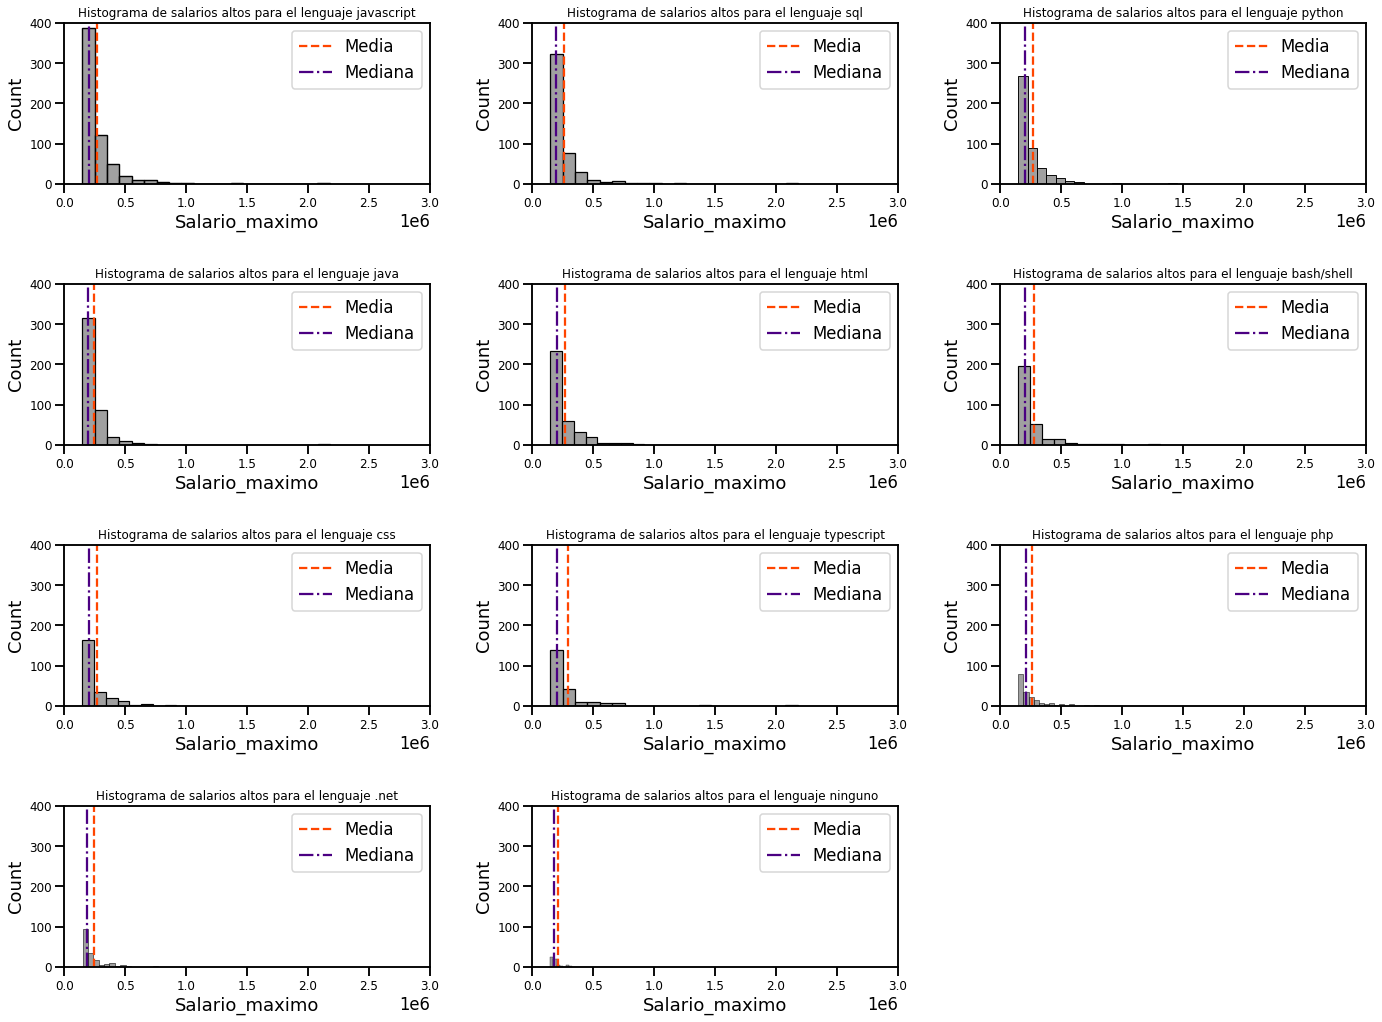

In [12]:
plt.figure(figsize=(20,15))
for i,lenguaje in enumerate(interest_languages["language"]):
  df_lenguaje = df_lang[df_lang.programming_language == lenguaje]
  plt.subplot(4,3,i+1)
  plt.axvline(df_lenguaje.Salario_maximo.mean(), color = 'orangered',linestyle='--', label='Media')
  plt.axvline(df_lenguaje.Salario_maximo.median(), color = 'indigo',linestyle='-.', label='Mediana')
  plt.legend()
  plt.title(f'Histograma de salarios altos para el lenguaje {lenguaje}', fontsize = 12)
  plt.xlim(0,3000000)
  plt.ylim(0,400)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize = 12)
  plt.tight_layout(2)
  seaborn.histplot(df_lenguaje.Salario_maximo, bins = 20, color='gray')

Lo visualizamos todo junto en un mismo gráfico categórico, para los salarios altos, sacando los salarios extremos (menores a 1.000.000)


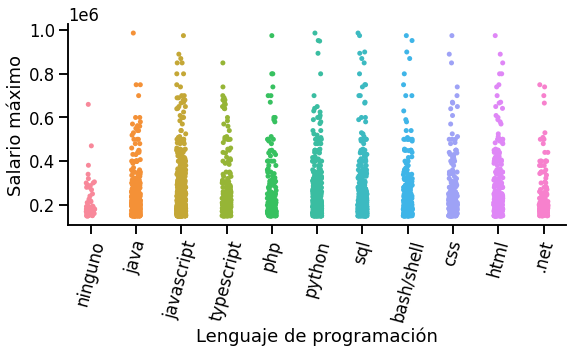

In [13]:
df_lang_cat = pd.merge(df_lang,interest_languages, left_on="programming_language", right_on="language", how = 'inner')

seaborn.catplot(data=df_lang_cat[df_lang_cat.Salario_maximo < 1e6], y='Salario_maximo',
                x='programming_language', height=4, aspect=2)
plt.xticks(rotation=75)
plt.xlabel("Lenguaje de programación")
plt.ylabel("Salario máximo")
plt.show()

Luego de analizar los histogramas y el catplot, podemos concluir que, dentro del sub-conjunto de salarios altos, no hay ningún lengüaje de programación que esté asociado a ganar un mejor sueldo.

Para saber si existe alguna dependencia entre manejar determinado lengüaje y tener un salario alto, calculamos las probabilidades condicionales de ganar un sueldo alto dado que se domine cierto lengüaje.

In [14]:
proba = len(DF_Salarios_Altos)/len(df)
print('Probabilidad de pertenecer tener un salario alto: ' + str(proba))
print()

interest_languages['P(lang)'] = interest_languages['freq_all_salaries']/len(df)
interest_languages['P(lang_y_salario_alto)'] = interest_languages['freq_high_salaries']/len(df)
interest_languages['P(salario_alto_si_lang)'] = interest_languages['P(lang_y_salario_alto)'] / interest_languages['P(lang)']

Probabilidad de pertenecer tener un salario alto: 0.2316652994257588



En todos los casos se ve que la probabilidad es difierente a la P(salario_alto), lo que indicaria que hay dependencia entre saber o no uno de estos lenguajes y obtener un salario alto.

In [15]:
interest_languages[['language', 'P(salario_alto_si_lang)']].sort_values(by='P(salario_alto_si_lang)', ascending =False)

,language,P(salario_alto_si_lang)
2,python,0.309831
3,java,0.304886
5,bash/shell,0.298087
7,typescript,0.287548
0,javascript,0.244727
9,.net,0.218712
1,sql,0.214485
8,php,0.214366
6,css,0.198877
10,ninguno,0.196375


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Variables analizadas:

- Numéricas: Salario_maximo, profile_years_experience
- Categóricas: company_employee_number, work_contract_type, salary_in_usd


Analisis de Salario maximo vs años trabajados en una compañia en forma full time

El objetivo de esta comparacion era tratar de determinar si los años trabajados en una compañia en modo full time podria llegar a dar algun dato
acerca de la mejora salarial paulatina a medida que uno permanece en la empresa (actualizacion del sueldo segun antiguedad).
Como podemos ver no se logra observar ese comportamiento
Para realizar un mejor analisis de este comportamiento quizas seria mejor saber en que empresa trabaja cada persona y la entiguedad en la misma, 
y asi poder realizar una grafica por empesa a ver cual acuatliza mejor los suelos segun antiguedad.
Estos datos no se encuentran en el csv.
Incluso si quitaramos algunos outliers el comportamiento no cambia significativamente

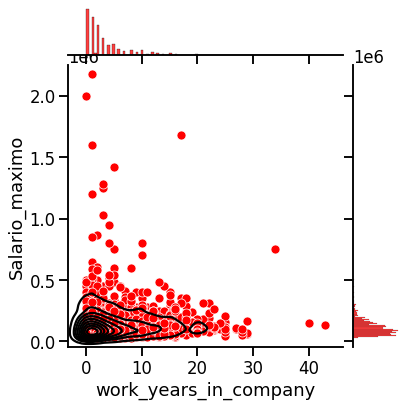

In [16]:
Salario_maximo_full_time = clean_max_salaries[clean_max_salaries['work_contract_type'] == 'Full-Time']
Salario_maximo_full_time
seaborn.jointplot(x = Salario_maximo_full_time.work_years_in_company, y = Salario_maximo_full_time.Salario_maximo, color = 'red').plot_joint(seaborn.kdeplot, color = 'black')
plt.show()



No se observa una relación entre el aumento de la antigüedad en la empresa y la evolución del sueldo. Sería bueno conocer a qué empresa pertenece cada encuestado para poder hacer el análisis por empresa.

Análisis de company_employee_number vs salario_maximo
Analizamos primero las medidas de tendencia central, sobre la sub-población que no trabaja bajo la modalidad "Freelance", a la que denominamos "asalariados"

In [17]:
asalariados = df[df.work_contract_type != 'Freelance']
asalariados = asalariados[asalariados.Salario_maximo < 1e6]

mean = asalariados.groupby(by='company_employee_number').Salario_maximo.mean()
median = asalariados.groupby(by='company_employee_number').Salario_maximo.median()
q25 = asalariados.groupby(by='company_employee_number').Salario_maximo.quantile(q=.25)
q75 = asalariados.groupby(by='company_employee_number').Salario_maximo.quantile(q=.75)
count = asalariados.groupby(by='company_employee_number').Salario_maximo.count()

sumarize = pd.concat([mean,median, q25, q75, count] ,axis =1)
sumarize.columns = ['media', 'mediana', 'Q25', 'Q75', 'frecuencia']

sumarize = sumarize.sort_values(by='mediana')

sumarize

,media,mediana,Q25,Q75,frecuencia
company_employee_number,,,,,
1-10,126065.261902,70000.00,43750.00,140000.0,420
11-50,104738.901946,77000.00,52000.00,120000.0,977
101-200,114071.576250,90000.00,60000.00,135000.0,649
51-100,118103.641838,90000.00,59750.00,133250.0,720
501-1000,120037.251362,100000.00,71000.00,140000.0,536
1001-2000,123156.584881,103000.00,79000.00,150000.0,353
201-500,128279.745501,103000.00,70000.00,160000.0,789
10001+,126310.664672,111242.73,75000.00,150000.0,543
5001-10000,124542.331609,112800.00,71129.00,150000.0,343


Lo vemos gráficamente con un boxplot

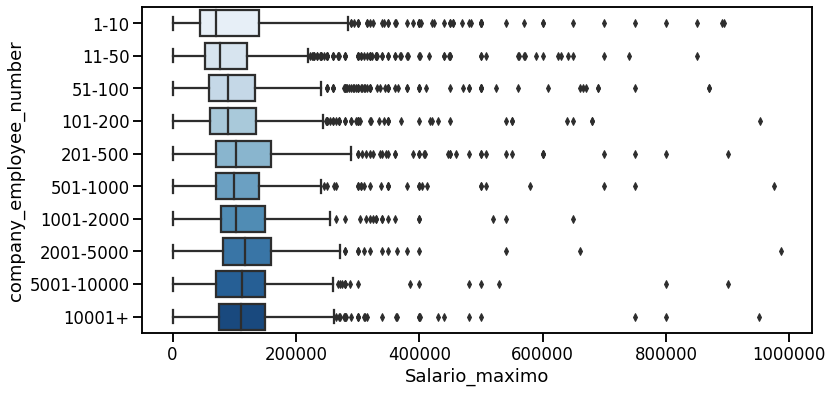

In [18]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=asalariados, x='Salario_maximo', y='company_employee_number', palette='Blues', order = ['1-10','11-50','51-100','101-200','201-500','501-1000','1001-2000','2001-5000','5001-10000','10001+'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

No pareciera haber una relación entre el tamaño de la empresa y el salario del trabajador. Al menos a partir del análisis visual, las medidas de tendencia central obtenidas sobre los salarios para cada rango de tamaño de companía, "no parecen diferir significativamente". Sin embargo, para demostrar numéricamente si esas diferencias son importantes o no, todavía nos faltan herramientas por aprender.

Análisis de `'work_contract_type'` vs `'salario_maximo'`

In [19]:
mean = df.groupby(by='work_contract_type').Salario_maximo.mean()
median = df.groupby(by='work_contract_type').Salario_maximo.median()
q25  = df.groupby(by='work_contract_type').Salario_maximo.quantile(q=.25)
q75  = df.groupby(by='work_contract_type').Salario_maximo.quantile(q=.75)
count = df.groupby(by='work_contract_type').Salario_maximo.count()

sumarize = pd.concat([mean,median, q25, q75, count] ,axis =1)
sumarize.columns = ['media', 'mediana', 'Q25', 'Q75', 'frecuencia']

sumarize = sumarize.sort_values(by='mediana')

sumarize

,media,mediana,Q25,Q75,frecuencia
work_contract_type,,,,,
Part-Time,54471.116689,45000.0,30000.0,65000.0,302
Tercerizado (trabajo a través de consultora o agencia),103343.566038,84400.0,54750.0,115650.0,212
Freelance,133659.142857,89960.0,47750.0,180000.0,154
Full-Time,117428.948309,100000.0,66200.0,140000.0,5013
Remoto (empresa de otro país),402825.771634,350000.0,202250.0,547500.0,202


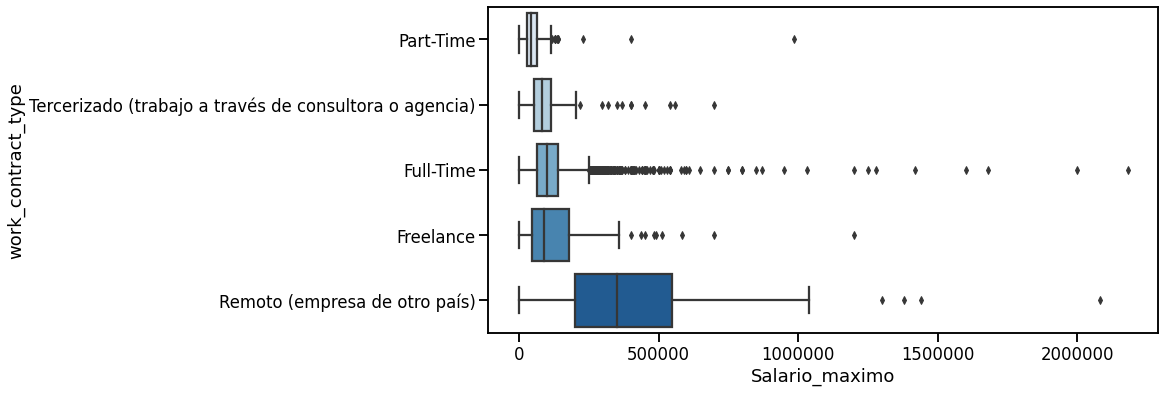

In [20]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x='Salario_maximo', y='work_contract_type', order=['Part-Time', 'Tercerizado (trabajo a través de consultora o agencia)', 'Full-Time', 'Freelance', 'Remoto (empresa de otro país)'], palette='Blues')
plt.ticklabel_format(style='plain', axis='x')

Se observa como es el aumento tanto los valores medios como de la amplitud de la distribución del salario maximo recibido desde los participantes con tipo de contrato `'Part-Time'` hacia los `'remotos con empresas en otro pais'`.

In [21]:
df["salary_in_usd"].replace(np.nan, 'Mi sueldo NO esta dolarizado', regex=True, inplace = True)

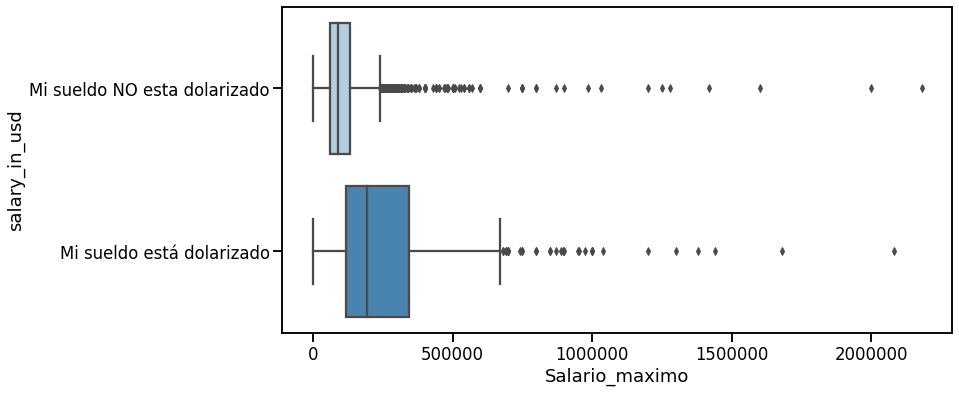

In [22]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x='Salario_maximo', y='salary_in_usd', palette='Blues')
plt.ticklabel_format(style='plain', axis='x')

Se observa mayores valores en todas las métricas para los casos de sueldos dolarizados. Esto es congruente con la variable de trabajo remoto hacia el exterior analizada anteriormente

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [23]:
df[['salary_monthly_BRUTO', 'salary_monthly_NETO']].corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.833335
salary_monthly_NETO,0.833335,1.000000


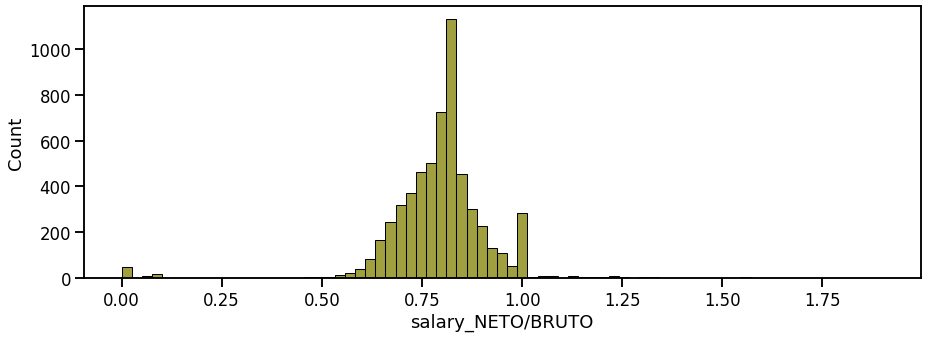

In [24]:
df['salary_NETO/BRUTO']=df['salary_monthly_NETO']/df['salary_monthly_BRUTO']
df_clean = df[(df['salary_NETO/BRUTO']>0 )& (df['salary_NETO/BRUTO']<2)]
fig = plt.figure(figsize=(15, 5))
seaborn.histplot(df_clean['salary_NETO/BRUTO'], bins=75, color = 'olive')
plt.show()

Se procedió primero al cálculo del cociente entre  salario NETO y BRUTO. y se observa que la gran mayoria de los valores están ubicados entre 0.6 y 1, aunque también existen valores  de cociente muy próximos  a cero o incluso mayores a 1. 

Estos casos pueden ser adjudicados a condiciones de trabajo en negro, errores de tipeo o falta de comprensión de lo que es sueldo bruto y neto.

Para disminuir estos inconvenientes y para que sea representativo de lo que "gana" cada persona se generó la variable salario_maximo (Ejercicio 1), la cual corresponde al maximo entre el bruto y el neto.ás

Más allá de este análisis, se calculó también la correlación entre ambas variables:

In [28]:
corr = df[['salary_monthly_BRUTO','salary_monthly_NETO']].corr()
print(corr)

                      salary_monthly_BRUTO  salary_monthly_NETO
salary_monthly_BRUTO              1.000000             0.833335
salary_monthly_NETO               0.833335             1.000000


Observamos al graficar el salario neto contra el bruto, que existe una relación casi lineal entre ellos. Se observan algunos casos atípicos donde la diferencia entre bruto y neto no sigue esta relación.

Aún así, al calcular la correlación entre ambas variables obtenemos un valor muy alto, de aprox. 0.83.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Definimos primero ambas poblaciones
Para tener grupos numerosos, se decidió hacer el siguiente corte:
Poblacion1 ("df_univ") = 'Universitario','Posdoctorado', 'Posgrado', 'Doctorado'
Poblacion 2 ("df_no_univ") = 'Terciario', 'Primario', 'Secundario'

In [ ]:
df_univ = df[df.profile_studies_level.isin(['Universitario','Posdoctorado', 'Posgrado', 'Doctorado'])]
df_no_univ = df[df.profile_studies_level.isin(['Terciario', 'Primario', 'Secundario'])]

Graficamos los histogramas de salario para cada una

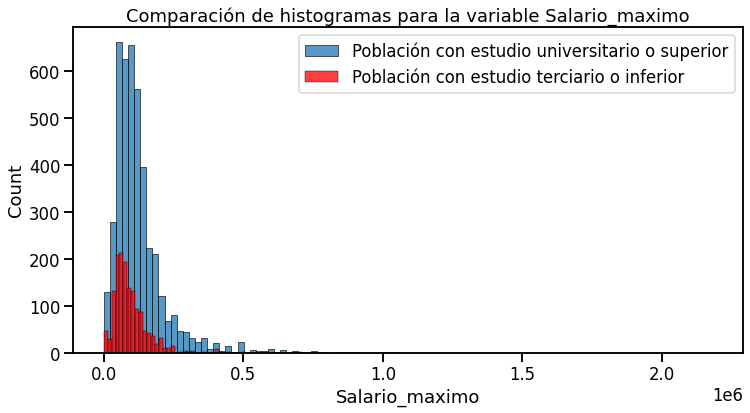

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.histplot(df_univ.Salario_maximo, bins = 100, label = 'Población con estudio universitario o superior')
seaborn.histplot(df_no_univ.Salario_maximo, color = 'red', bins = 100, label = 'Población con estudio terciario o inferior')
plt.title("Comparación de histogramas para la variable Salario_maximo")
plt.legend()
plt.show()

Al observar las medidas de las dos poblaciones se observa que quienes tienen educación universitaria o superior tienen compensación mayor. Si bien esto no es del todo claro en el histograma de arriba, al analizar la media y los cuartiles se puede ver con mayor claridad

In [ ]:
print('Estadísticas para el grupo con educación universitaria o superior')
print(df_univ['Salario_maximo'].describe().round(),'\n')

print('Estadísticas para el grupo con educación terciaria o inferior' )
print(df_no_univ['Salario_maximo'].describe().round())

Estadísticas para el grupo con educación universitaria o superior
count       4341.0
mean      130667.0
std       129145.0
min            1.0
25%        66000.0
50%       100000.0
75%       150000.0
max      2180000.0
Name: Salario_maximo, dtype: float64 

Estadísticas para el grupo con educación terciaria o inferior
count       1542.0
mean      104901.0
std       105826.0
min            1.0
25%        54152.0
50%        81828.0
75%       122750.0
max      1420000.0
Name: Salario_maximo, dtype: float64


Ahora analizamos las propabilidades simples, conjuntas y condicionales de ganar un salario alto según el nivel de estudios. El "salario alto" lo sacamos del corte que hicimos en el ejercicio 1

In [ ]:
salario_alto = DF_Salarios_Altos["Salario_maximo"].min()
prob_gana_mucho = len(DF_Salarios_Altos) / len(df)

estudio_mucho = len(df_univ)
prob_estudio_mucho = estudio_mucho/len(df)

gana_mucho_estudio_mucho = df_univ[df_univ['Salario_maximo']>=salario_alto]
prob_gM_EM = len(gana_mucho_estudio_mucho)/len(df)

gana_mucho_estudio_poco = df_no_univ[df_no_univ['Salario_maximo']>=salario_alto]
prob_gM_EP = len(gana_mucho_estudio_poco)/len(df)

prob_cond_gM_EM = prob_gM_EM / prob_estudio_mucho
prob_cond_gM_EP = prob_gM_EP / (1- prob_estudio_mucho)

print(f'La probabilidad de ganar mucho es {prob_gana_mucho}')
print(f'La probabilidad condicionada de ganar mucho DADO que se estudió mucho es {prob_cond_gM_EM}')
print(f'La probabilidad condicionada de ganar mucho DADO que NO se estudió mucho es {prob_cond_gM_EP}')

La probabilidad de ganar mucho es 0.2316652994257588
La probabilidad condicionada de ganar mucho DADO que se estudió mucho es 0.25637613661565756
La probabilidad condicionada de ganar mucho DADO que NO se estudió mucho es 0.1614123581336696


El análisis anterior indica que el hecho de tener estudios al menos universitarios (sin distinguir si están completos o no) aumenta la probabilidad de tener un *salario alto* en los términos aqúi definidos.

**d) Densidad Conjunta condicional**

---


Elija dos variables numéricas y una categórica. Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


profile_years_experience

Se encontraron una menor cantidad de valores extremos que parecieran erroneos y distorisionan las escalas. Para resolver ese problema se eliminaron los registros mayores a 1M y mas de 50 años de experiencia.


In [ ]:
df_no_outliers =df[(df["Salario_maximo"] < 1000000) & (df["profile_years_experience"]<35)]
df_no_outliers_1 =df[(df["Salario_maximo"] < 1000000) & (df["profile_years_experience"]<35)&(df["work_people_in_charge_of"]<30)]



In [ ]:

df_no_outliers.loc[df_no_outliers["work_contract_type"]=="Tercerizado (trabajo a través de consultora o agencia)","work_contract_type"]="Tercerizado"
df_no_outliers.loc[df_no_outliers["work_contract_type"]=="Remoto (empresa de otro país)","work_contract_type"]="Remoto"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Puede advertirse que no hay un relacion relevante entre los años de experiencia y los salarios.
Otra vez vemos que los salarios mas altos son para trabajos remotos que tienen una dispersion alta en relacion a los años de experiencia.

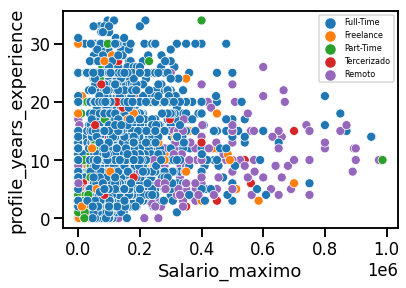

In [ ]:
seaborn.scatterplot(data=df_no_outliers,x="Salario_maximo",y="profile_years_experience",hue="work_contract_type",legend="brief")
plt.legend(fontsize=8) # using a size in points


A partir del gráfico, lo que se observa es que no hay una relación muy clara entre la cantidad de años trabajados (experiencia) y el salario. Sin embargo, una conclusión indirecta de este análisis es que quienes están trabajando en modo remoto están ganando mejores salarios que el resto. Se puede ver mejor haciendo un boxplot que se centre solamente en estas dos variables:

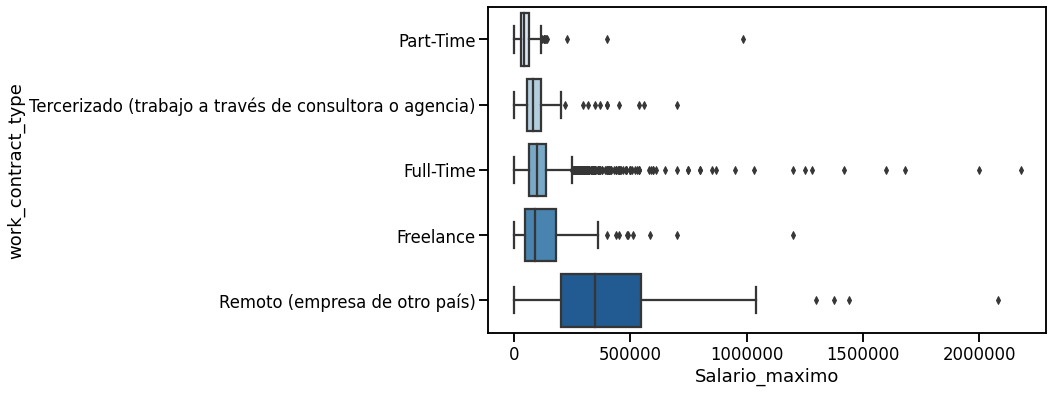

In [38]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=df,y='work_contract_type',x='Salario_maximo', order=['Part-Time', 'Tercerizado (trabajo a través de consultora o agencia)', 'Full-Time', 'Freelance', 'Remoto (empresa de otro país)'], palette='Blues')
plt.ticklabel_format(style='plain', axis='x')